In [1]:
import pandas as pd

# Đọc file cleaned_data.csv
data = pd.read_csv('../Data/cleaned_data.csv')

# Hiển thị một vài dòng đầu tiên để xác nhận dữ liệu đã đọc
print(data.head())


              Xã/Phường Quận/Huyện Tỉnh/Thành phố            Chủ đầu tư  \
0       Phường Quảng An     Tây Hồ         Hà Nội  Tân Hoàng Minh Group   
1  Phường Hoàng Văn Thụ  Hoàng Mai         Hà Nội      Tập đoàn Lã Vọng   
2  Phường Hoàng Văn Thụ  Hoàng Mai         Hà Nội      Tập đoàn Lã Vọng   
3  Phường Hoàng Văn Thụ  Hoàng Mai         Hà Nội      Tập đoàn Lã Vọng   
4           Xã Dương Xá    Gia Lâm         Hà Nội     Tập đoàn Vingroup   

                     Tên dự án  Diện tích             Mức giá  Số phòng ngủ  \
0            D’. Le Roi Soleil      146.0   94.24657440185547           3.0   
1         Louis City Hoàng Mai       95.0  289.47369384765625           6.0   
2         Louis City Hoàng Mai      112.8   336.8794250488281           6.0   
3         Louis City Hoàng Mai      113.0               270.0           5.0   
4  Vinhomes Ocean Park Gia Lâm       55.0    46.3636360168457           2.0   

   Số toilet          Pháp lý         Nội thất            Mặt tiền  \
0   

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


# Chuẩn bị dữ liệu cho biểu đồ nhiệt bằng cách tính giá trung bình theo quận/huyện
heatmap_data = data.dropna(subset=['Quận/Huyện', 'Mức giá'])
heatmap_data['Mức giá'] = pd.to_numeric(heatmap_data['Mức giá'], errors='coerce')
avg_price_by_district = heatmap_data.groupby('Quận/Huyện')['Mức giá'].mean().reset_index()

# Đọc shapefile của Hà Nội để lấy bản đồ
# Thay 'path_to_hanoi_shapefile' bằng đường dẫn tới file shapefile của Hà Nội
hanoi_map = gpd.read_file('F:/python/ltxl/BTL/three-businessmans/Map/Districts level 2.shp')


# Kết hợp dữ liệu giá với shapefile dựa trên tên quận/huyện
hanoi_map = hanoi_map.merge(avg_price_by_district, left_on="district_name_column", right_on="Quận/Huyện")

# Vẽ bản đồ Hà Nội với biểu đồ nhiệt áp dụng cho giá trung bình từng quận/huyện
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
hanoi_map.plot(column='Mức giá', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Thêm lớp nền bản đồ
ctx.add_basemap(ax, crs=hanoi_map.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# Tùy chỉnh tiêu đề và hiển thị
plt.title("Bản đồ phân bố giá bất động sản trung bình theo quận/huyện tại Hà Nội")
plt.xlabel("")
plt.ylabel("")
plt.show()


KeyError: 'district_name_column'

f:\anaconda\envs\BTL\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'gadm41_VNM_shp': 'gadm41_VNM_2' (default), 'gadm41_VNM_3'. Specify layer parameter to avoid this warning.
  result = read_func(
C:\Users\Admin\AppData\Local\Temp\ipykernel_9712\2328400427.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(hanoi_map.geometry.centroid.x, hanoi_map.geometry.centroid.y, hanoi_map['NAME_2']):


Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')


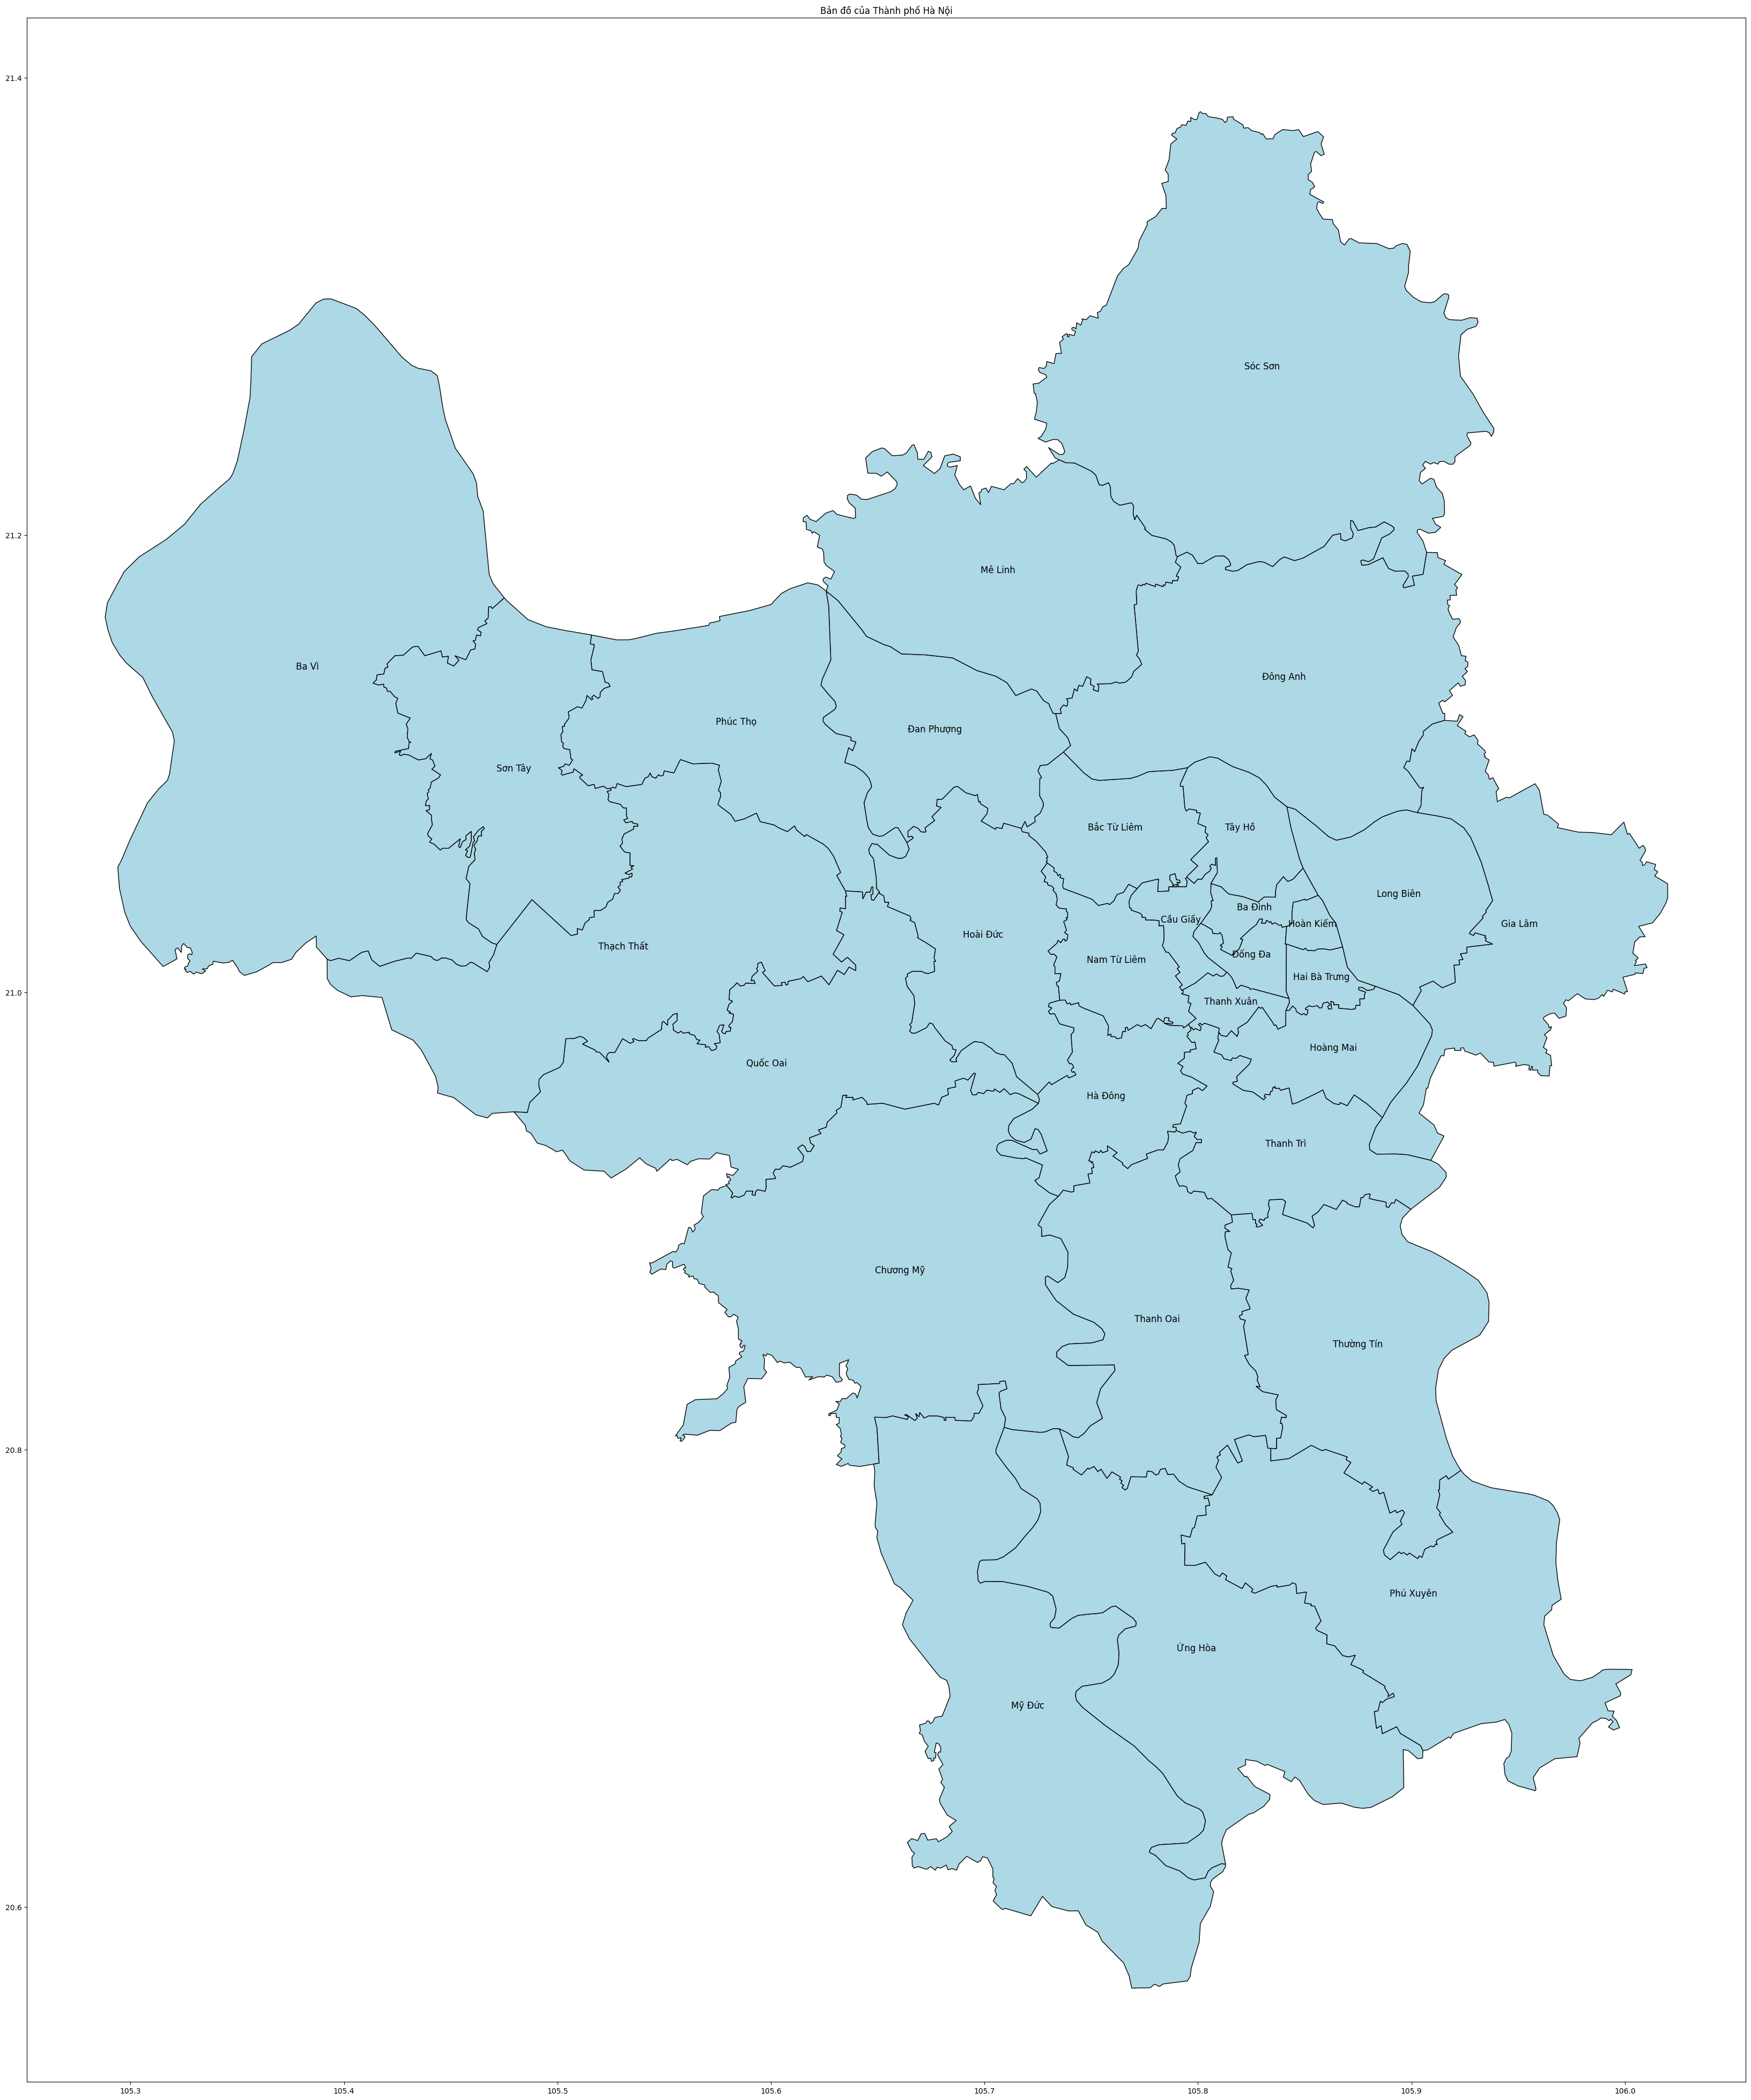

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Đọc shapefile của toàn bộ Việt Nam
vietnam_map = gpd.read_file('F:/python/ltxl/BTL/three-businessmans/Map/gadm41_VNM_shp')

# Kiểm tra cột thuộc tính
#print(vietnam_map.columns)

# Trích xuất chỉ dữ liệu của thành phố Hà Nội
hanoi_map = vietnam_map[vietnam_map['NAME_1'] == 'Hà Nội']

# Vẽ bản đồ của thành phố Hà Nội
fig, ax = plt.subplots(figsize=(50, 50))
hanoi_map.plot(ax=ax, color='lightblue', edgecolor='black')

# Hiển thị tên các quận huyện trên bản đồ
for x, y, label in zip(hanoi_map.geometry.centroid.x, hanoi_map.geometry.centroid.y, hanoi_map['NAME_2']):
    ax.text(x, y, label, fontsize=12, ha='center')

# Tùy chỉnh thêm nếu cần
ax.set_title('Bản đồ của Thành phố Hà Nội')
plt.show()


f:\anaconda\envs\BTL\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'gadm41_VNM_shp': 'gadm41_VNM_2' (default), 'gadm41_VNM_3'. Specify layer parameter to avoid this warning.
  result = read_func(
C:\Users\Admin\AppData\Local\Temp\ipykernel_9712\3703064110.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(hanoi_map.geometry.centroid.x, hanoi_map.geometry.centroid.y, hanoi_map['NAME_2']):


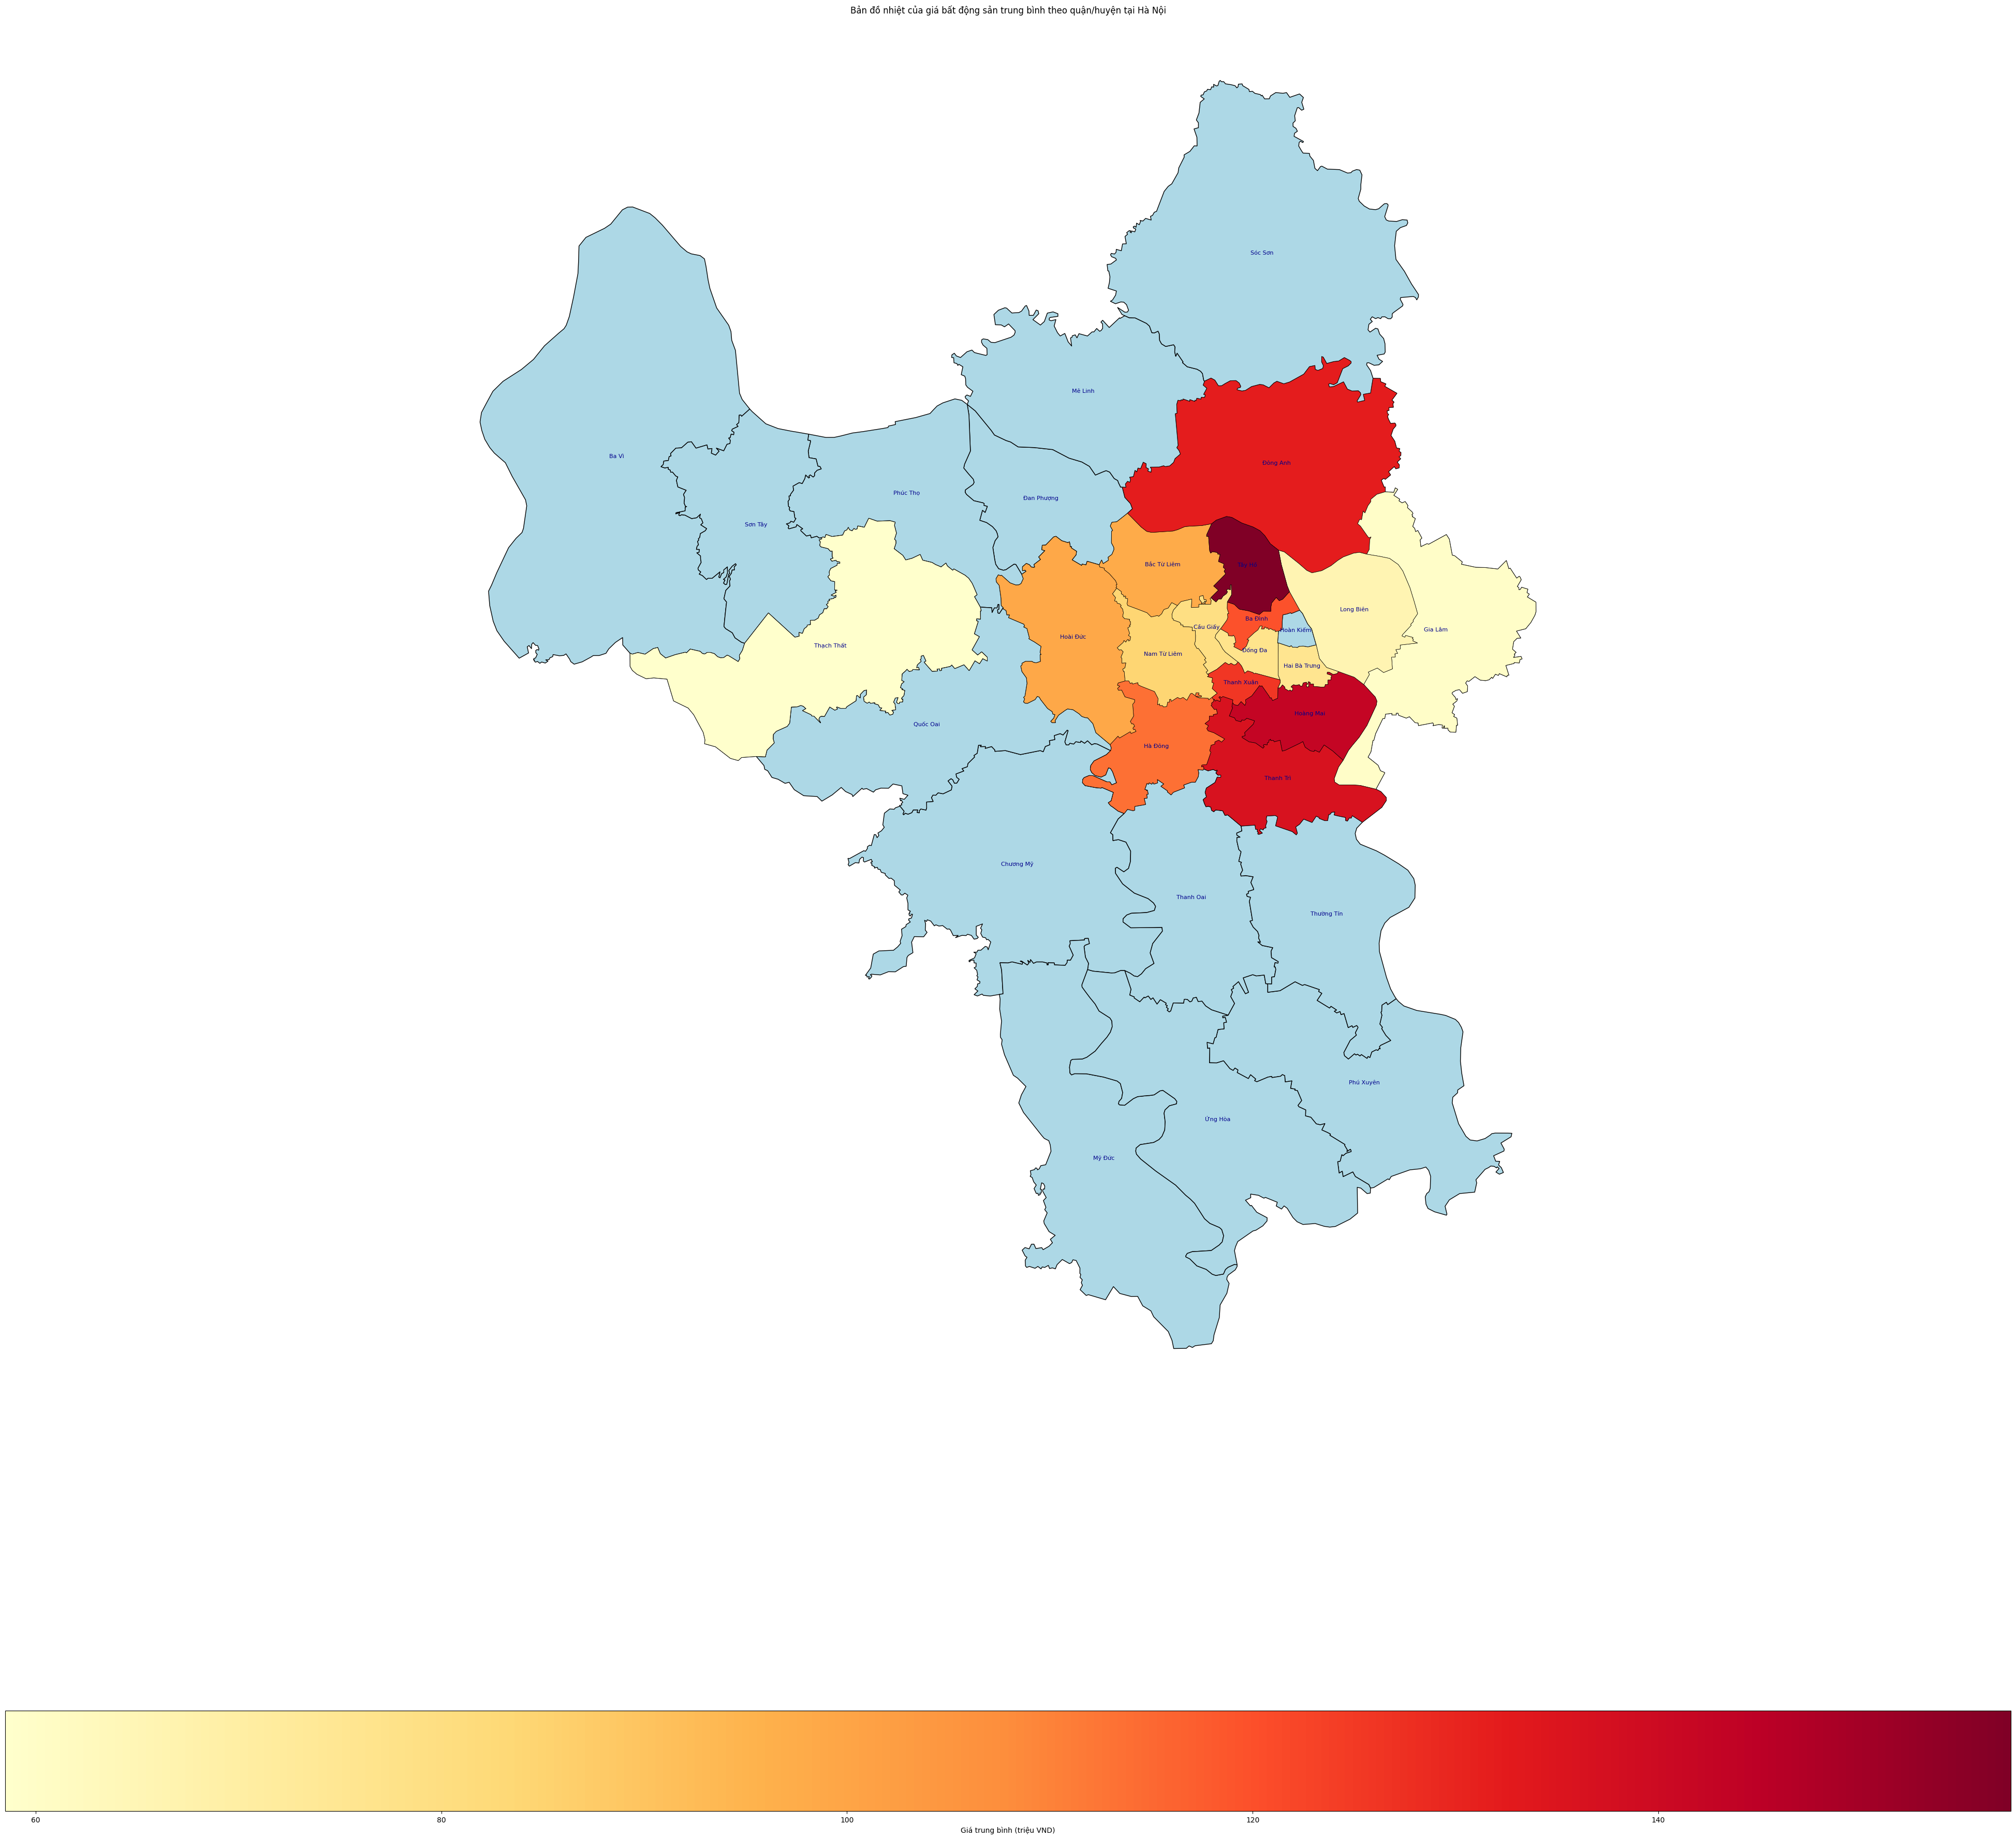

In [104]:
# Import các thư viện cần thiết
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Đọc dữ liệu bất động sản từ file CSV
data = pd.read_csv('../Data/cleaned_data.csv')

# Loại bỏ các hàng có giá trị thiếu trong cột 'Quận/Huyện' và 'Mức giá'
heatmap_data = data.dropna(subset=['Quận/Huyện', 'Mức giá'])

# Chuyển đổi cột 'Mức giá' thành kiểu số
heatmap_data['Mức giá'] = pd.to_numeric(heatmap_data['Mức giá'], errors='coerce')

# Tính giá trung bình theo quận/huyện
avg_price_by_district = heatmap_data.groupby('Quận/Huyện')['Mức giá'].mean().reset_index()

# Đọc shapefile của Việt Nam và lọc lấy Hà Nội
vietnam_map = gpd.read_file('F:/python/ltxl/BTL/three-businessmans/Map/gadm41_VNM_shp')
hanoi_map = vietnam_map[vietnam_map['NAME_1'] == 'Hà Nội']


# Ghép dữ liệu giá trung bình vào bản đồ Hà Nội
hanoi_map = hanoi_map.merge(avg_price_by_district, left_on='NAME_2', right_on='Quận/Huyện', how='left')

# Vẽ bản đồ Hà Nội với giá trị nhiệt độ bất động sản
fig, ax = plt.subplots(figsize=(50, 50))
hanoi_map.plot(ax=ax, color='lightblue', edgecolor='black')
hanoi_map.plot(column='Mức giá', ax=ax, cmap='YlOrRd', legend=True, edgecolor='black', linewidth=0.5,
               legend_kwds={'label': "Giá trung bình (triệu VND)", 'orientation': "horizontal"})

# Hiển thị tên các quận/huyện lên bản đồ (không có giá trị trung bình)
for x, y, label in zip(hanoi_map.geometry.centroid.x, hanoi_map.geometry.centroid.y, hanoi_map['NAME_2']):
    ax.text(x, y, label, ha='center', fontsize=8, color='darkblue')

ax.set_xlabel("")
ax.set_ylabel("")
ax.axis('off')
# Tùy chỉnh và hiển thị bản đồ
ax.set_title('Bản đồ nhiệt của giá bất động sản trung bình theo quận/huyện tại Hà Nội')
plt.show()


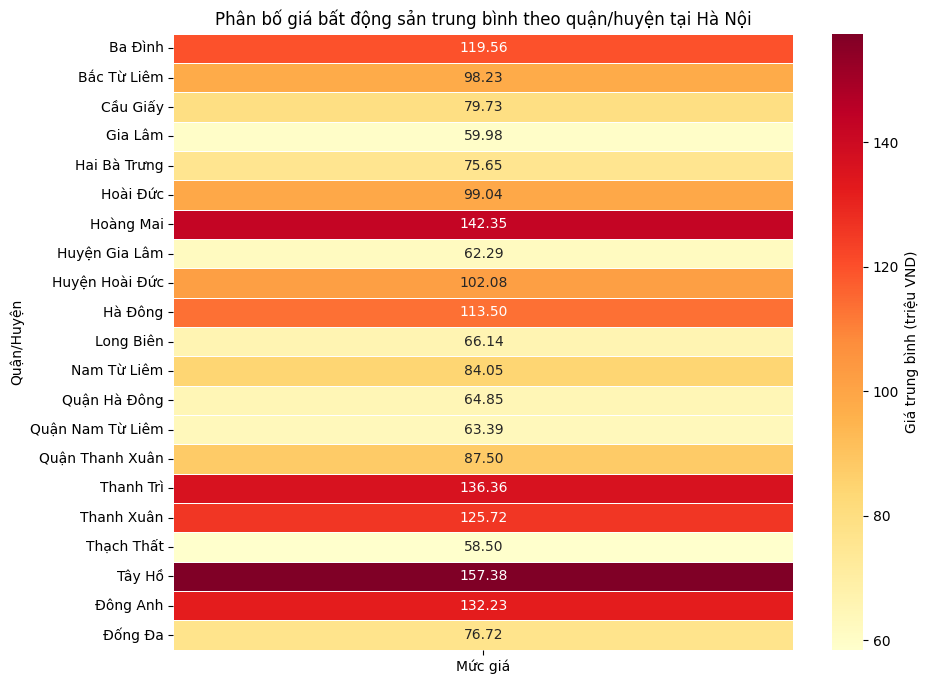

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Chuẩn bị dữ liệu cho biểu đồ nhiệt bằng cách tính giá trung bình theo quận/huyện
# Loại bỏ các hàng có giá trị thiếu trong cột 'Quận/Huyện' và 'Mức giá'
heatmap_data = data.dropna(subset=['Quận/Huyện', 'Mức giá'])

# Chuyển đổi cột 'Mức giá' thành kiểu số (nếu dữ liệu đang ở dạng chuỗi)
heatmap_data['Mức giá'] = pd.to_numeric(heatmap_data['Mức giá'], errors='coerce')

# Tính giá trung bình theo quận/huyện
avg_price_by_district = heatmap_data.groupby('Quận/Huyện')['Mức giá'].mean().reset_index()

# Chuyển dữ liệu sang dạng bảng xoay để tạo biểu đồ nhiệt
heatmap_pivot = avg_price_by_district.pivot_table(values='Mức giá', index='Quận/Huyện')

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Giá trung bình (triệu VND)'})
plt.title("Phân bố giá bất động sản trung bình theo quận/huyện tại Hà Nội")
plt.xlabel("")
plt.ylabel("Quận/Huyện")
plt.show()


In [53]:
import geopandas as gpd

# Đọc shapefile của toàn bộ Việt Nam
vietnam_map = gpd.read_file('F:/python/ltxl/BTL/three-businessmans/Map/gadm41_VNM_shp')

# Kiểm tra danh sách các cột thuộc tính
print(vietnam_map.columns)


Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')


f:\anaconda\envs\BTL\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'gadm41_VNM_shp': 'gadm41_VNM_1' (default), 'gadm41_VNM_2', 'gadm41_VNM_3'. Specify layer parameter to avoid this warning.
  result = read_func(


In [166]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
import branca.colormap as cm

# Đọc dữ liệu bất động sản từ file CSV
data = pd.read_csv('../Data/cleaned_data.csv')

# Loại bỏ các hàng có giá trị thiếu trong cột 'Quận/Huyện' và 'Mức giá'
heatmap_data = data.dropna(subset=['Quận/Huyện', 'Mức giá'])

# Chuyển đổi cột 'Mức giá' thành kiểu số
heatmap_data['Mức giá'] = pd.to_numeric(heatmap_data['Mức giá'], errors='coerce')

# Tính giá trung bình theo quận/huyện
avg_price_by_district = heatmap_data.groupby('Quận/Huyện')['Mức giá'].mean().reset_index()

# Đọc shapefile của Việt Nam và lọc lấy Hà Nội
vietnam_map = gpd.read_file('F:/python/ltxl/BTL/three-businessmans/Map/gadm41_VNM_shp')
hanoi_map = vietnam_map[vietnam_map['NAME_1'] == 'Hà Nội']

# Ghép dữ liệu giá trung bình vào bản đồ Hà Nội
hanoi_map = hanoi_map.merge(avg_price_by_district, left_on='NAME_2', right_on='Quận/Huyện', how='left')

# Tạo một bản đồ nền bằng folium
hanoi_center = [21.0285, 105.8542]  # Tọa độ trung tâm của Hà Nội
m = folium.Map(location=hanoi_center, zoom_start=11, tiles= None)

# Tạo colormap
colormap = cm.linear.YlOrRd_09.scale(hanoi_map['Mức giá'].min(), hanoi_map['Mức giá'].max())

# Chuyển đổi GeoDataFrame thành GeoJson và thêm vào bản đồ
geojson = folium.GeoJson(
    hanoi_map,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['Mức giá']) if feature['properties']['Mức giá'] else 'lightblue',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6,
    },
    tooltip=GeoJsonTooltip(
        fields=['NAME_2', 'Mức giá'],
        aliases=['Quận/Huyện', 'Giá trung bình (triệu VND)'],
        localize=True
    ),
    highlight_function=lambda feature: {
        'fillColor': 'yellow',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7
    }
).add_to(m)

# Thêm colormap vào bản đồ
colormap.add_to(m)
# Lưu và hiển thị bản đồ
m


f:\anaconda\envs\BTL\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'gadm41_VNM_shp': 'gadm41_VNM_2' (default), 'gadm41_VNM_3'. Specify layer parameter to avoid this warning.
  result = read_func(


In [170]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
import branca.colormap as cm

# Đọc dữ liệu bất động sản từ file CSV
data = pd.read_csv('../Data/cleaned_data.csv')

# Loại bỏ các hàng có giá trị thiếu trong cột 'Quận/Huyện' và 'Mức giá'
heatmap_data = data.dropna(subset=['Quận/Huyện', 'Mức giá'])

# Chuyển đổi cột 'Mức giá' thành kiểu số
heatmap_data['Mức giá'] = pd.to_numeric(heatmap_data['Mức giá'], errors='coerce')

# Tính giá trung bình theo quận/huyện
avg_price_by_district = heatmap_data.groupby('Quận/Huyện')['Mức giá'].mean().reset_index()

# Đọc shapefile của Việt Nam và lọc lấy Hà Nội
vietnam_map = gpd.read_file('F:/python/ltxl/BTL/three-businessmans/Map/gadm41_VNM_shp')
hanoi_map = vietnam_map[vietnam_map['NAME_1'] == 'Hà Nội']

# Ghép dữ liệu giá trung bình vào bản đồ Hà Nội
hanoi_map = hanoi_map.merge(avg_price_by_district, left_on='NAME_2', right_on='Quận/Huyện', how='left')

# Tạo một bản đồ nền bằng folium
hanoi_center = [21.0285, 105.8542]  # Tọa độ trung tâm của Hà Nội
m = folium.Map(location=hanoi_center, zoom_start=11, tiles=None)

# Tạo colormap
colormap = cm.linear.YlOrRd_09.scale(hanoi_map['Mức giá'].min(), hanoi_map['Mức giá'].max())
colormap.caption = 'Average Price (triệu VND)'

# Hàm tạo bảng HTML rỗng
def get_empty_table_html():
    columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5']
    rows = ""
    for _ in range(10):  # Tạo 10 hàng rỗng
        rows += "<tr>" + "".join([f"<td></td>" for _ in columns]) + "</tr>"
    return f"""<table border='1' style='width:100%;'><thead><tr>{''.join([f'<th>{col}</th>' for col in columns])}</tr></thead><tbody>{rows}</tbody></table>"""

# Hàm tạo nội dung popup với thông tin quận/huyện
def get_popup_html(properties):
    table_html = get_empty_table_html()  # Tạo bảng rỗng
    return f"""
    <div style="width: 400px">
        <h4>{properties['NAME_2']}</h4>
        {table_html}
    </div>
    """

# Hàm thêm sự kiện hiển thị bảng thông tin khi nhấp vào quận/huyện
def on_each_feature(feature, layer):
    # Kiểm tra xem thuộc tính 'NAME_2' có tồn tại không để tránh lỗi
    if 'NAME_2' in feature['properties']:
        popup_html = get_popup_html(feature['properties'])  # Tạo popup HTML
        folium.Popup(popup_html, max_width=450).add_to(layer)  # Thêm popup vào layer
    else:
        # Xử lý khi thuộc tính 'NAME_2' không tồn tại (nếu cần)
        pass

# Chuyển đổi GeoDataFrame thành GeoJson và thêm vào bản đồ
geojson = folium.GeoJson(
    hanoi_map,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['Mức giá']) if feature['properties']['Mức giá'] else 'lightblue',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6,
    },
    tooltip=GeoJsonTooltip(
        fields=['NAME_2', 'Mức giá'],
        aliases=['Quận/Huyện', 'Giá trung bình (triệu VND)'],
        localize=True
    ),
    highlight_function=lambda feature: {
        'fillColor': 'yellow',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7
    },
    on_each_feature=on_each_feature
).add_to(m)

# Thêm colormap vào bản đồ
colormap.add_to(m)

# Lưu và hiển thị bản đồ
m.save('hanoi_interactive_heatmap.html')


f:\anaconda\envs\BTL\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'gadm41_VNM_shp': 'gadm41_VNM_2' (default), 'gadm41_VNM_3'. Specify layer parameter to avoid this warning.
  result = read_func(


TypeError: Object of type function is not JSON serializable

In [126]:
from folium import IFrame

